In [22]:
import pandas as pd
import numpy as np

In [23]:
# Load the data into DataFrames
train_users = pd.read_csv('./data/train_users_2.csv')
test_users = pd.read_csv('./data/test_users.csv')

In [24]:
# Inspect data 
len(train_users.id.unique()), len(test_users.id.unique()), train_users.shape, test_users.shape

(213451, 62096, (213451, 16), (62096, 15))

In [25]:
# Merge train and test users
users = pd.concat((train_users, test_users), axis=0)
users.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,20090319043255
1,seo,google,38,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809
2,direct,direct,56,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247
3,direct,direct,42,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129
4,direct,direct,41,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,20091208061105


In [26]:
# Change Dates columns to Python Date format
users['date_account_created'] = pd.to_datetime(users['date_account_created'], format='%Y-%m-%d')
users['timestamp_first_active'] = pd.to_datetime(users['timestamp_first_active'], format='%Y%m%d%H%M%S')
#users['date_account_created'].fillna(df_all.timestamp_first_active, inplace=True)

In [27]:
# Extract Date Features
import datetime as dt
users['day_account_created'] = users['date_account_created'].dt.weekday
users['month_account_created'] = users['date_account_created'].dt.month
users['quarter_account_created'] = users['date_account_created'].dt.quarter
users['year_account_created'] = users['date_account_created'].dt.year
users['hour_first_active'] = users['timestamp_first_active'].dt.hour
users['day_first_active'] = users['timestamp_first_active'].dt.weekday
users['month_first_active'] = users['timestamp_first_active'].dt.month
users['quarter_first_active'] = users['timestamp_first_active'].dt.quarter
users['year_first_active'] = users['timestamp_first_active'].dt.year
users['created_less_active'] = (users['date_account_created'] - users['timestamp_first_active']).dt.days

Data Exploration

In [28]:
users.gender.value_counts()

-unknown-    129480
FEMALE        77524
MALE          68209
OTHER           334
Name: gender, dtype: int64

Plot Histogram Gender

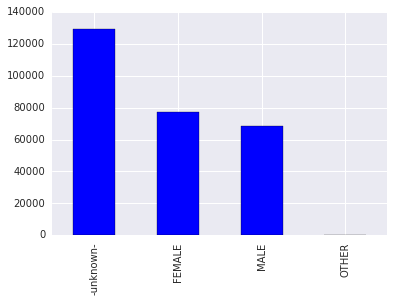

In [29]:
#import seaborn
#seaborn.distplot(users.gender)

import matplotlib.pyplot as plt
%matplotlib inline

users.gender.value_counts().plot(kind='bar')

In [30]:
users.gender.value_counts().index

Index([u'-unknown-', u'FEMALE', u'MALE', u'OTHER'], dtype='object')

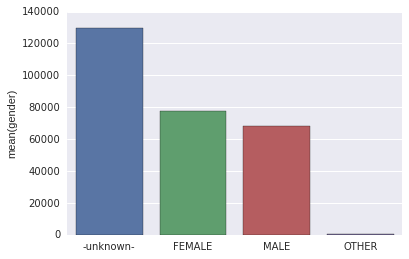

In [31]:
import seaborn as sns

ax = sns.barplot(x=users.gender.value_counts().index, y=users.gender.value_counts())

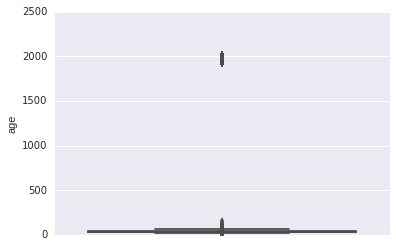

In [32]:
ax = sns.boxplot(y=users.age)

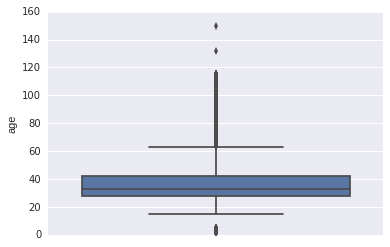

In [33]:
ax = sns.boxplot(y=users[users.age < 200].age)

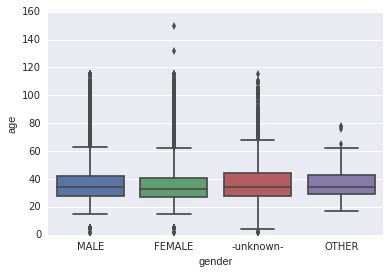

In [34]:
ax = sns.boxplot(x='gender',y='age',data=users[users.age < 200])

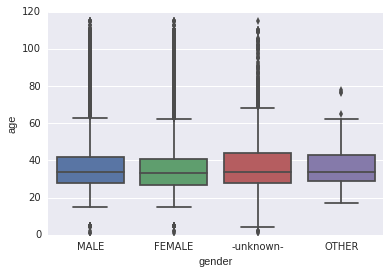

In [35]:
ax = sns.boxplot(x='gender',y='age',data=users[users.age < 120])

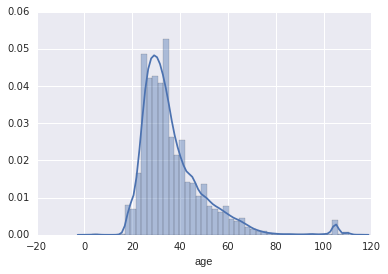

In [36]:
sns.distplot(users[users.age < 120].age)

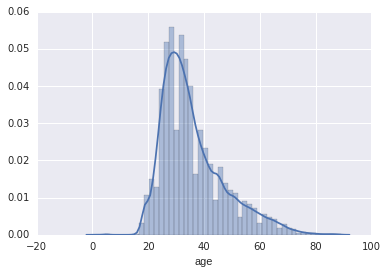

In [37]:
sns.distplot(users[users.age < 90].age)

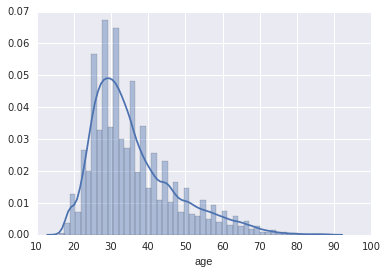

In [38]:
sns.distplot(users[(users.age < 90) & (users.age > 15)].age)

In [40]:
users[(users.age < 90) & (users.age > 15)].age.describe()

count    155664.000000
mean         35.957794
std          11.419194
min          16.000000
25%          28.000000
50%          33.000000
75%          41.000000
max          89.000000
Name: age, dtype: float64

In [41]:
users[(users.age < 90) & (users.age > 15)].age.median()

33.0

In [54]:
users[(users.age < 90) & (users.age > 15)][['age','country_destination']].head()

,age,country_destination
1,38,NDF
2,56,US
3,42,other
4,41,US
6,46,US


In [55]:
users_by_age = users[(users.age < 90) & (users.age > 15)][['age','country_destination']]

In [57]:
users_by_age.country_destination.value_counts()

NDF      55696
US       47631
other     7400
FR        3650
IT        1985
GB        1736
ES        1675
CA        1055
DE         833
NL         590
AU         428
PT         156
Name: country_destination, dtype: int64

In [58]:
# Age distribution and country destination
users_by_age = users[(users.age < 90) & (users.age > 15)][['age','country_destination']]

age_range = [(15,19),(20,24),(25,29),(30,34),(35,39),(40,44),(45,49),(50,54),(55,59),(60,64)]
age_group = []

age_group = [users_by_age[(users_by_age.age > v[0]) & (users_by_age.age < v[1])].country_destination.value_counts() for v in age_range]


In [78]:
country = users_by_age.country_destination.unique().tolist()

In [81]:
country.remove(np.nan)

In [82]:
country

['NDF', 'US', 'other', 'CA', 'FR', 'IT', 'ES', 'GB', 'NL', 'DE', 'AU', 'PT']

In [86]:
country_age = []
for c in country:
    row = []
    for i in range(len(age_group)):
        try:
            row.append(age_group[i][c])
        except:
            row.append(0)
    print c
    print row
    country_age.append(row)

NDF
[385, 2582, 7258, 7162, 4842, 3253, 2548, 1850, 1283, 881]
US
[237, 1613, 7128, 7360, 4444, 2548, 1744, 1209, 931, 661]
other
[50, 285, 974, 1154, 718, 401, 250, 193, 177, 108]
CA
[11, 26, 111, 157, 100, 61, 39, 39, 20, 17]
FR
[24, 190, 391, 522, 350, 217, 140, 133, 89, 59]
IT
[18, 130, 223, 288, 189, 103, 76, 63, 45, 32]
ES
[7, 126, 195, 243, 147, 63, 54, 45, 27, 25]
GB
[12, 93, 182, 229, 176, 85, 73, 62, 55, 29]
NL
[5, 42, 73, 85, 56, 23, 16, 11, 16, 14]
DE
[12, 46, 114, 122, 72, 52, 27, 22, 19, 12]
AU
[1, 6, 55, 53, 53, 22, 20, 13, 12, 5]
PT
[0, 7, 17, 23, 14, 9, 3, 5, 5, 3]


In [60]:
len(age_group), len(age_range)

(10, 10)

In [68]:
age_labels = [str(x[0])+'-'+str(x[1]) for x in age_range]

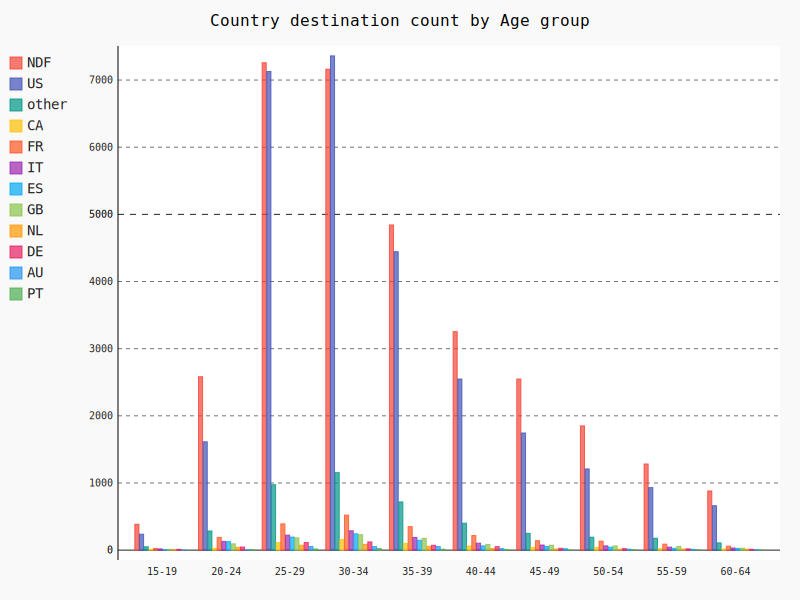

In [88]:
import pygal
from IPython.display import SVG

line_chart = pygal.Bar()
line_chart.title = 'Country destination count by Age group'
line_chart.x_labels = age_labels
for i in range(len(country)):
    line_chart.add(country[i], country_age[i])
line_chart.render_to_file('airbnb-age.svg')
SVG(filename='airbnb-age.svg')

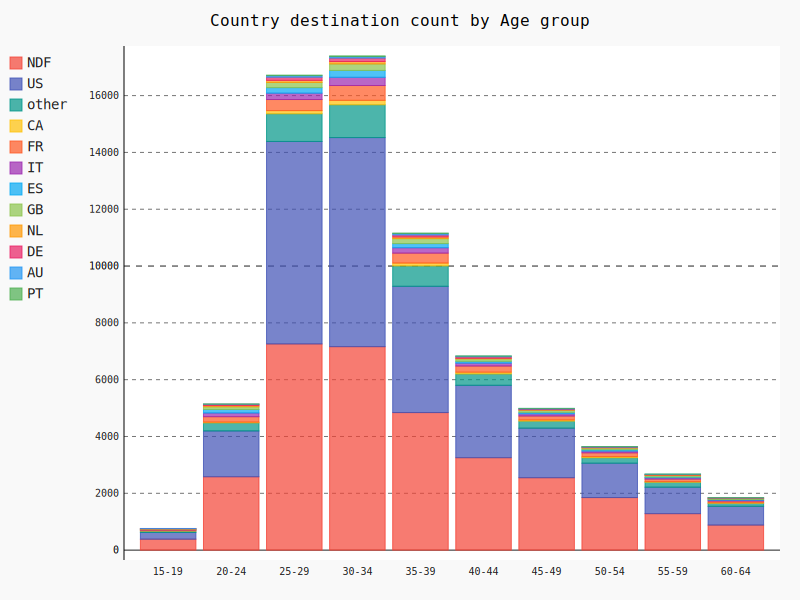

In [89]:
import pygal
from IPython.display import SVG

line_chart = pygal.StackedBar()
line_chart.title = 'Country destination count by Age group'
line_chart.x_labels = age_labels
for i in range(len(country)):
    line_chart.add(country[i], country_age[i])
line_chart.render_to_file('airbnb-age-stack.svg')
SVG(filename='airbnb-age-stack.svg')

In [91]:
country_age

[[385, 2582, 7258, 7162, 4842, 3253, 2548, 1850, 1283, 881],
 [237, 1613, 7128, 7360, 4444, 2548, 1744, 1209, 931, 661],
 [50, 285, 974, 1154, 718, 401, 250, 193, 177, 108],
 [11, 26, 111, 157, 100, 61, 39, 39, 20, 17],
 [24, 190, 391, 522, 350, 217, 140, 133, 89, 59],
 [18, 130, 223, 288, 189, 103, 76, 63, 45, 32],
 [7, 126, 195, 243, 147, 63, 54, 45, 27, 25],
 [12, 93, 182, 229, 176, 85, 73, 62, 55, 29],
 [5, 42, 73, 85, 56, 23, 16, 11, 16, 14],
 [12, 46, 114, 122, 72, 52, 27, 22, 19, 12],
 [1, 6, 55, 53, 53, 22, 20, 13, 12, 5],
 [0, 7, 17, 23, 14, 9, 3, 5, 5, 3]]

In [93]:
country_age_percent = []
for c in country:
    row = []
    for i in range(len(age_group)):
        try:
            row.append(age_group[i][c] * 100/float(sum(age_group[i])))
        except:
            row.append(0)
    print c
    print row
    country_age_percent.append(row)

NDF
[50.524934383202101, 50.174893120870578, 43.406494826864424, 41.165651224278655, 43.383209389839621, 47.579347667105459, 51.062124248496993, 50.754458161865571, 47.891004106009703, 47.724810400866737]
US
[31.102362204724411, 31.344733773804897, 42.629029364272469, 42.303713070467872, 39.817220679150616, 37.267807517917213, 34.949899799599201, 33.168724279835388, 34.751773049645394, 35.807150595882987]
other
[6.5616797900262469, 5.5382821609016712, 5.8250104658812276, 6.6329463156684678, 6.433115312248006, 5.8651455316659353, 5.0100200400801604, 5.2949245541838135, 6.6069428891377378, 5.8504875406283858]
CA
[1.4435695538057742, 0.50524679362611735, 0.66383589498235751, 0.90240257500862164, 0.89597706298718749, 0.89220418312125205, 0.78156312625250501, 1.0699588477366255, 0.74654721911160882, 0.92091007583965334]
FR
[3.1496062992125986, 3.6921881072677807, 2.3383768913342502, 3.0003448672261182, 3.1359197204551563, 3.1739066842182244, 2.8056112224448899, 3.6488340192043895, 3.3221351

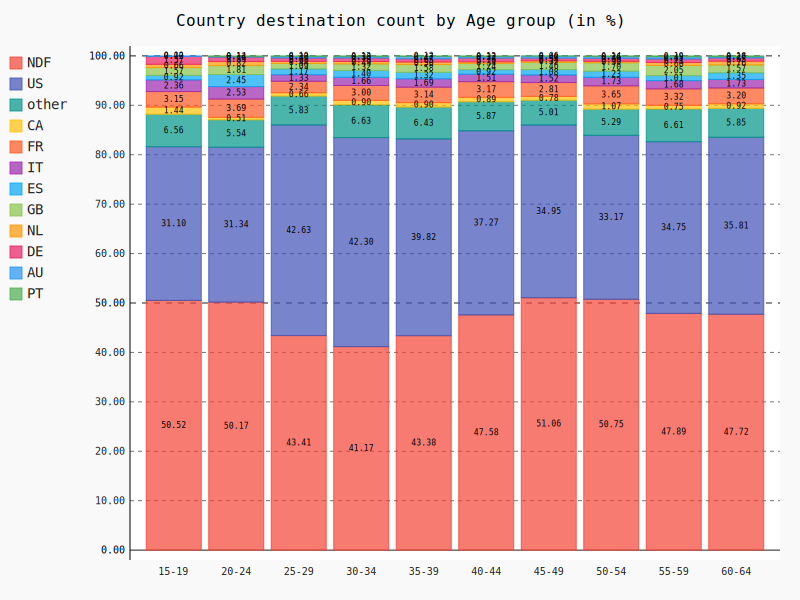

In [104]:
from pygal.style import DefaultStyle
line_chart = pygal.StackedBar(print_values=True, style=DefaultStyle(value_font_size=8))
line_chart.title = 'Country destination count by Age group (in %)'
line_chart.x_labels = age_labels
for i in range(len(country)):
    line_chart.add(country[i], country_age_percent[i])
line_chart.value_formatter = lambda x: "%.2f" % x
line_chart.render_to_file('airbnb-age-stack-percent.svg')
SVG(filename='airbnb-age-stack-percent.svg')

Explore null age and null gender columns

In [106]:
# Age distribution and country destination
users_no_age = users[users.age.isnull()][['age','country_destination']]
users_no_age = users_no_age.country_destination.value_counts()

In [120]:
'''no_age_percent = []
total_count = float(sum(users_no_age))
for c in country:
    no_age_percent.append(users_no_age[c] * 100/total_count)
    
no_age = []
total_count = float(sum(users_no_age))
for c in country:
    no_age.append(users_no_age[c])
'''

'no_age_percent = []\ntotal_count = float(sum(users_no_age))\nfor c in country:\n    no_age_percent.append(users_no_age[c] * 100/total_count)\n    \nno_age = []\ntotal_count = float(sum(users_no_age))\nfor c in country:\n    no_age.append(users_no_age[c])\n'

In [117]:
len(country), len(country_age), len(country_age_percent)

(12, 12, 12)

In [119]:
total_count = float(sum(users_no_age))
for i, c in enumerate(country):
    country_age[i].append(users_no_age[c])
    country_age_percent[i].append(users_no_age[c] * 100/total_count)

In [122]:
age_labels.append('no age')

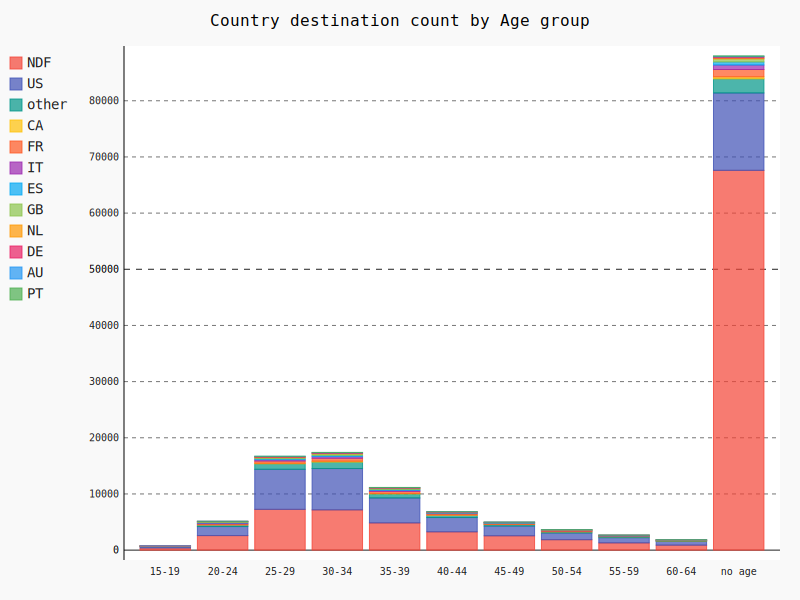

In [123]:
line_chart = pygal.StackedBar()
line_chart.title = 'Country destination count by Age group'
line_chart.x_labels = age_labels
for i in range(len(country)):
    line_chart.add(country[i], country_age[i])
line_chart.render_to_file('airbnb-age-stack.svg')
SVG(filename='airbnb-age-stack.svg')

In [126]:
users.shape, users[users.age.isnull()].shape

((275547, 26), (116866, 26))

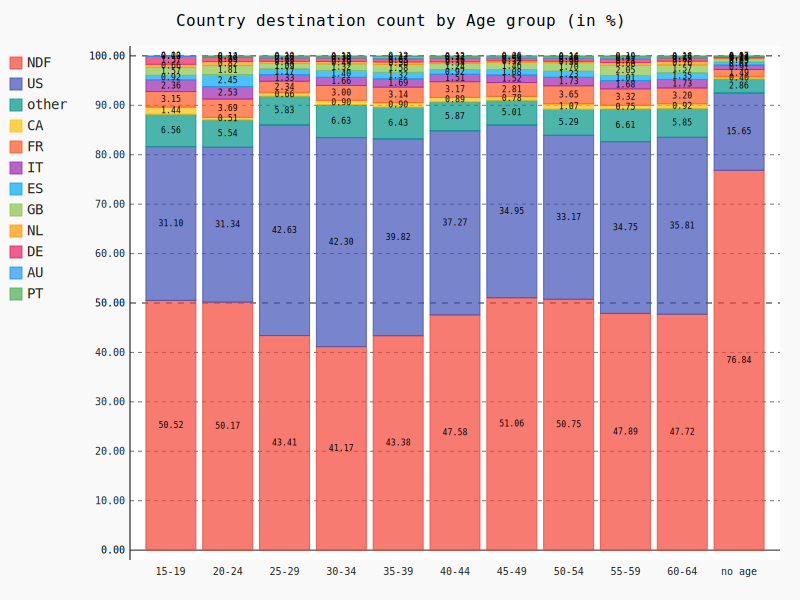

In [124]:
line_chart = pygal.StackedBar(print_values=True, style=DefaultStyle(value_font_size=8))
line_chart.title = 'Country destination count by Age group (in %)'
line_chart.x_labels = age_labels
for i in range(len(country)):
    line_chart.add(country[i], country_age_percent[i])
line_chart.value_formatter = lambda x: "%.2f" % x
line_chart.render_to_file('airbnb-age-stack-percent.svg')
SVG(filename='airbnb-age-stack-percent.svg')

In [180]:
# Explore Country destination by Gender
genderlist = users.gender.unique().tolist()
country_gender = []
for c in country:
    country_gender.append(users[users.country_destination == c].gender.value_counts())

In [181]:
len(country_gender)

12

In [182]:
for d in country_gender:
    d.sort_index(inplace=True)

In [183]:
country_gender

[-unknown-    66670
 FEMALE       31048
 MALE         26719
 OTHER          106
 Name: gender, dtype: int64, -unknown-    20109
 FEMALE       22694
 MALE         19457
 OTHER          116
 Name: gender, dtype: int64, -unknown-    3469
 FEMALE       3160
 MALE         3443
 OTHER          22
 Name: gender, dtype: int64, -unknown-    491
 FEMALE       455
 MALE         477
 OTHER          5
 Name: gender, dtype: int64, -unknown-    1713
 FEMALE       1962
 MALE         1335
 OTHER          13
 Name: gender, dtype: int64, -unknown-    1040
 FEMALE       1091
 MALE          699
 OTHER           5
 Name: gender, dtype: int64, -unknown-    715
 FEMALE       853
 MALE         677
 OTHER          4
 Name: gender, dtype: int64, -unknown-    758
 FEMALE       881
 MALE         682
 OTHER          3
 Name: gender, dtype: int64, -unknown-    227
 FEMALE       254
 MALE         278
 OTHER          3
 Name: gender, dtype: int64, -unknown-    284
 FEMALE       358
 MALE         416
 OTHER          3


In [184]:
genderlist.sort()

In [185]:
genderlist

['-unknown-', 'FEMALE', 'MALE', 'OTHER']

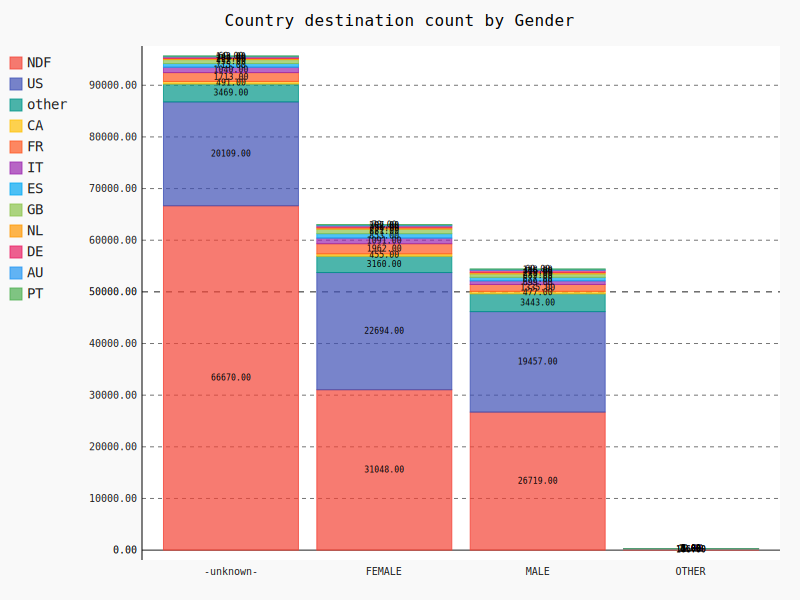

In [173]:
line_chart = pygal.StackedBar(print_values=True, style=DefaultStyle(value_font_size=8))
line_chart.title = 'Country destination count by Gender'
line_chart.x_labels = genderlist
for i in range(len(country)):
    line_chart.add(country[i], country_gender[i])
line_chart.value_formatter = lambda x: "%.2f" % x
line_chart.render_to_file('airbnb-gender-stack.svg')
SVG(filename='airbnb-gender-stack.svg')

In [186]:
country

['NDF', 'US', 'other', 'CA', 'FR', 'IT', 'ES', 'GB', 'NL', 'DE', 'AU', 'PT']

In [200]:
users[users.gender=='-unknown-'].country_destination.value_counts()

NDF      66670
US       20109
other     3469
FR        1713
IT        1040
GB         758
ES         715
CA         491
DE         284
NL         227
AU         143
PT          69
Name: country_destination, dtype: int64

In [198]:
sum_by_gender = []
for g in genderlist:
    sum_by_gender.append(users[users.gender==g].country_destination.count())

In [199]:
sum_by_gender

[95688, 63041, 54440, 282]

In [205]:
# Calculate percentage
country_gender_percentage = []
for g in range(len(country_gender)):
    row = []
    for i in range(len(sum_by_gender)):
        row.append(country_gender[g][i] * 100 / float(sum_by_gender[i]))
    country_gender_percentage.append(row)

In [206]:
country_gender_percentage

[[69.674358331243212,
  49.250487777795406,
  49.079720793534165,
  37.588652482269502],
 [21.015174316528718,
  35.998794435367458,
  35.740264511388688,
  41.134751773049643],
 [3.6253239695677619,
  5.0126108405640775,
  6.3243938280675973,
  7.8014184397163122],
 [0.51312599280996574,
  0.72175251027109344,
  0.87619397501836882,
  1.7730496453900708],
 [1.790193127664911,
  3.1122602750590884,
  2.4522409992652463,
  4.6099290780141846],
 [1.0868656466850597,
  1.7306197553972811,
  1.283982365907421,
  1.7730496453900708],
 [0.7472201320959786,
  1.3530876731016324,
  1.2435709037472447,
  1.4184397163120568],
 [0.79215784633391861,
  1.397503212195238,
  1.2527553269654665,
  1.0638297872340425],
 [0.23722932865145055,
  0.40291239034913784,
  0.51065393093313738,
  1.0638297872340425],
 [0.29679792659476634,
  0.56788439269681634,
  0.76414401175606173,
  1.0638297872340425],
 [0.14944402641919571,
  0.32835773544201391,
  0.34533431300514328,
  0.3546099290780142],
 [0.0721093

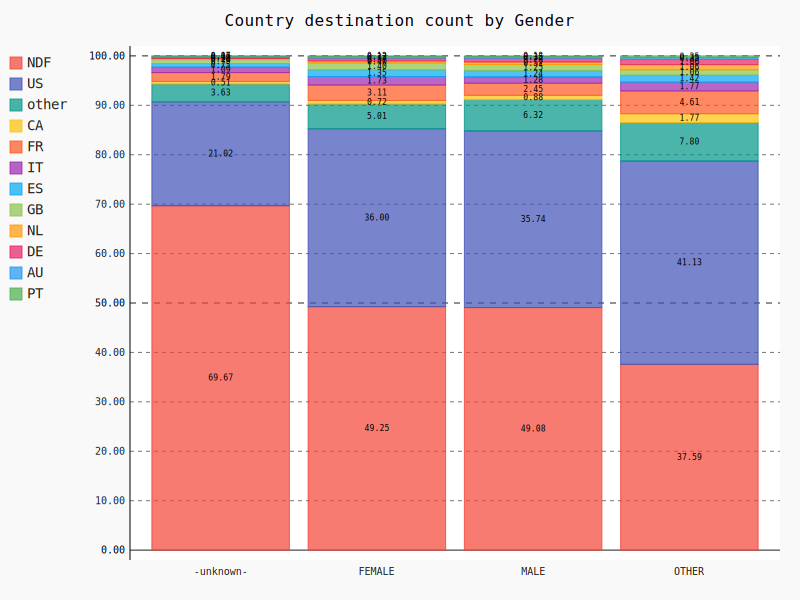

In [207]:
line_chart = pygal.StackedBar(print_values=True, style=DefaultStyle(value_font_size=8))
line_chart.title = 'Country destination count by Gender'
line_chart.x_labels = genderlist
for i in range(len(country)):
    line_chart.add(country[i], country_gender_percentage[i])
line_chart.value_formatter = lambda x: "%.2f" % x
line_chart.render_to_file('airbnb-gender-stack-percentage.svg')
SVG(filename='airbnb-gender-stack-percentage.svg')

In [208]:
# Replace null in Gender field
users.gender.replace('-unknown-', np.nan, inplace=True)

In [209]:
# Nullify outliers
users.loc[users['age'] > 90,'age'] = np.NaN
users.loc[users['age'] < 15,'age'] = np.NaN

print len(users[users['age'] > 90])
print len(users[users['age'] < 15])
print len(users[users['age'].isnull()])

0
0
119853


In [210]:
#Plot age distribution again after handling outliers
users = users.fillna({'age':-1})

In [211]:
t_users = users.copy()
t_users = t_users.set_index('id')

cat_features = ['affiliate_channel',
 'affiliate_provider',
 'first_affiliate_tracked',
 'first_browser',
 'first_device_type',
 'gender',
 'language',
 'signup_app',
 'signup_flow',
 'signup_method']
num_features = ['day_account_created',
 'month_account_created',
 'quarter_account_created',
 'year_account_created',
 'hour_first_active',
 'day_first_active',
 'month_first_active',
 'quarter_first_active',
 'year_first_active',
 'created_less_active',
 'age']
target = ['country_destination']

In [212]:
nogender_cat_features = ['affiliate_channel',
 'affiliate_provider',
 'first_affiliate_tracked',
 'first_browser',
 'first_device_type',
 'language',
 'signup_app',
 'signup_flow',
 'signup_method']

other_features = ['day_account_created',
 'month_account_created',
 'quarter_account_created',
 'year_account_created',
 'hour_first_active',
 'day_first_active',
 'month_first_active',
 'quarter_first_active',
 'year_first_active',
 'created_less_active',
 'age',
 'gender']

In [213]:
encode_users = pd.get_dummies(t_users[nogender_cat_features])

In [214]:
encode_users.shape, t_users[num_features].shape

((275547, 132), (275547, 11))

In [215]:
df_users = pd.merge(encode_users, t_users[other_features], how='inner', left_index=True, right_index=True)

In [216]:
df_users.shape

(275547, 144)

In [217]:
# Join/Merge with session data
user_devices = pd.read_csv('./data/user_devices.csv')
user_session = pd.read_csv('./data/user_session_detail.csv')

In [218]:
df_users = df_users.reset_index()

In [219]:
all_users = pd.merge(df_users, user_devices, how='left', left_on='id', right_on='user_id')
all_users = pd.merge(all_users, user_session, how='left', left_on='id', right_on='user_id')

In [220]:
all_users.shape

(275547, 316)

In [221]:
# Split notnull vs null gender
X_gender_users = all_users[all_users['gender'].isnull()==False]
X_pred_gender_users = all_users[all_users['gender'].isnull()]

In [222]:
y_gender_users = X_gender_users['gender']

In [223]:
id_X = X_gender_users.id
id_X_pred = X_pred_gender_users.id

In [224]:
X_gender_users = X_gender_users.drop(['gender','user_id_x','user_id_y','id'], axis=1)
X_pred_gender_users = X_pred_gender_users.drop(['gender','user_id_x','user_id_y','id'], axis=1)

In [225]:
X_gender_users = X_gender_users.fillna(0)
X_pred_gender_users = X_pred_gender_users.fillna(0)

In [226]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_y_gender_users = le.fit_transform(y_gender_users)

In [227]:
X_gender_users.shape, X_pred_gender_users.shape

((146067, 312), (129480, 312))

In [228]:
np.bincount(le_y_gender_users)

array([77524, 68209,   334])

In [229]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_gender_users, le_y_gender_users)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [230]:
pred_gender = neigh.predict(X_pred_gender_users)

In [231]:
np.bincount(pred_gender)

array([78235, 51245])

In [232]:
X_pred_gender_users['predicted_gender'] = le.inverse_transform(pred_gender)

In [233]:
impute_gender = pd.DataFrame(X_pred_gender_users['predicted_gender'])

In [234]:
impute_gender.head()

,predicted_gender
0,FEMALE
4,MALE
5,FEMALE
9,FEMALE
12,FEMALE


In [235]:
new_all_users = pd.merge(all_users, impute_gender, how='left', left_index=True, right_index=True)

In [236]:
new_all_users.shape, all_users.shape

((275547, 317), (275547, 316))

In [237]:
new_all_users.head()

,id,signup_flow,affiliate_channel_api,affiliate_channel_content,affiliate_channel_direct,affiliate_channel_other,affiliate_channel_remarketing,affiliate_channel_sem-brand,affiliate_channel_sem-non-brand,affiliate_channel_seo,...,view_search_results,view_security_checks,view_user_real_names,wishlist,wishlist_content_update,wishlist_note,your_listings,your_reservations,your_trips,predicted_gender
0,gxn3p5htnn,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FEMALE
1,820tgsjxq7,0,0,0,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4ft3gnwmtx,3,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bjjt8pjhuk,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,87mebub9p4,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MALE


In [238]:
new_all_users.loc[new_all_users.gender.isnull(),'gender'] = new_all_users['predicted_gender']

In [239]:
new_all_users = new_all_users.drop(['user_id_x','user_id_y','predicted_gender'], axis=1)

In [243]:
new_all_users.shape

(275547, 314)

In [244]:
destination = t_users['country_destination'].reset_index()

In [245]:
destination.head()

,id,country_destination
0,gxn3p5htnn,NDF
1,820tgsjxq7,NDF
2,4ft3gnwmtx,US
3,bjjt8pjhuk,other
4,87mebub9p4,US


In [246]:
df_all_users = new_all_users.fillna(0)

In [247]:
df_all_users = pd.merge(df_all_users, destination, how='inner', on='id')

In [248]:
df_all_users.shape

(275547, 315)

In [259]:
country_gender = []
for c in country:
    country_gender.append(df_all_users[df_all_users.country_destination == c].gender.value_counts())

In [260]:
for d in country_gender:
    d.sort_index(inplace=True)

In [253]:
genderlist.remove('-unknown-')

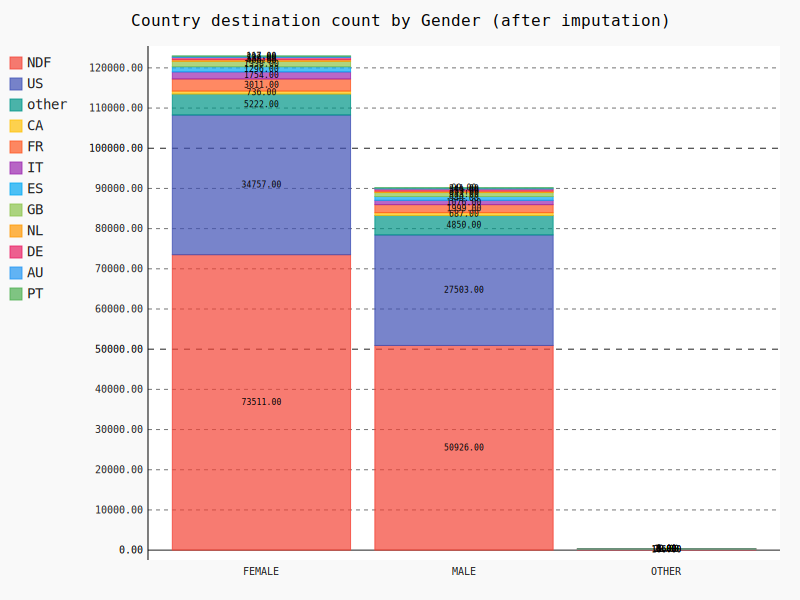

In [261]:
line_chart = pygal.StackedBar(print_values=True, style=DefaultStyle(value_font_size=8))
line_chart.title = 'Country destination count by Gender (after imputation)'
line_chart.x_labels = genderlist
for i in range(len(country)):
    line_chart.add(country[i], country_gender[i])
line_chart.value_formatter = lambda x: "%.2f" % x
line_chart.render_to_file('airbnb-gender-stack-after.svg')
SVG(filename='airbnb-gender-stack-after.svg')

In [262]:
sum_by_gender = []
for g in genderlist:
    sum_by_gender.append(df_all_users[df_all_users.gender==g].country_destination.count())

In [263]:
sum_by_gender

[122984, 90185, 282]

In [267]:
# Calculate percentage
country_gender_percentage = []
for g in range(len(country_gender)):
    row = []
    for i in range(len(sum_by_gender)):
        row.append(country_gender[g][i] * 100 / float(sum_by_gender[i]))
    country_gender_percentage.append(row)

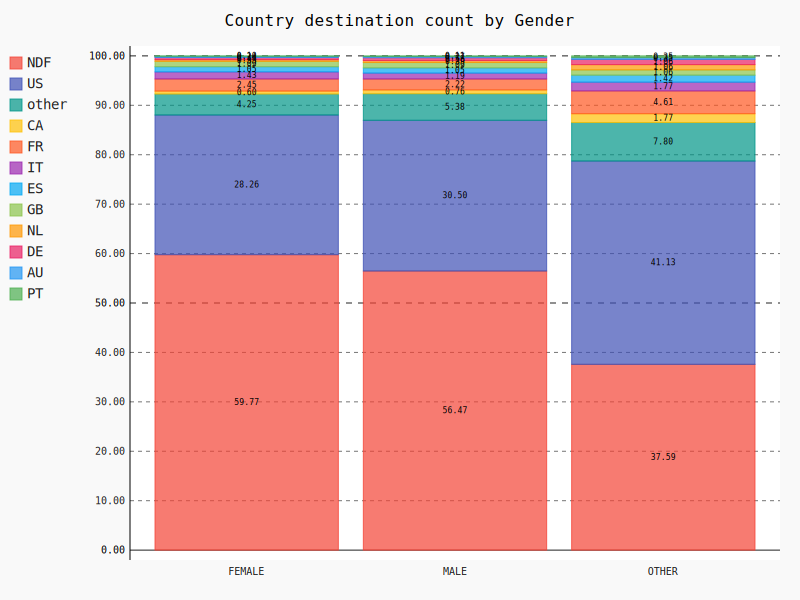

In [268]:
line_chart = pygal.StackedBar(print_values=True, style=DefaultStyle(value_font_size=8))
line_chart.title = 'Country destination count by Gender'
line_chart.x_labels = genderlist
for i in range(len(country)):
    line_chart.add(country[i], country_gender_percentage[i])
line_chart.value_formatter = lambda x: "%.2f" % x
line_chart.render_to_file('airbnb-gender-stack-percentage.svg')
SVG(filename='airbnb-gender-stack-percentage.svg')